# Funciones: Cómo encapsular código

Algunas tareas que deseamos realizar requieren de muchas líneas de código, lo que dificulta su lectura. Uno de los pilares del lenguaje Python es que podamos escribir código que podamos leer y entender rápidamente.

Muchas veces estas tareas no las realizaremos una única vez, sino que vamos a necesitar de ellas en el futuro o para otras aplicaciones.
Tener que reescribirlas en cada oportunidad no solo es tedioso, sino que nos arriesgamos a cometer errores.

Una solución para estos problemas es encapsular nuestro código en **funciones**, las cuales nos permiten encerrar códigos largos y/o complejos dentro de una _única y simple idea_ la que podemos utilizar o **llamar** de forma sencilla.

Por ejemplo, escribamos una función que transforme temperaturas en grados Fahrenheit a grados Celsius.

In [1]:
def fahrenheit_to_celsius(temperature):
    return 5 / 9 * (temperature - 32)

La función nos permite convertir un valor de temperatura en Fahrenheit a Celsius

In [2]:
fahrenheit_to_celsius(10.1)

-12.166666666666666

O bien, varios valores dentro de un `np.array`

In [3]:
import numpy as np

temperaturas_f = np.array([10.1, 14.6, 18.3, 20.3])
fahrenheit_to_celsius(temperaturas_f)

array([-12.16666667,  -9.66666667,  -7.61111111,  -6.5       ])

¿Cuál es el _tipo_ de una función?

In [4]:
type(fahrenheit_to_celsius)

function

> **Observaciones**
> - Con la instrucción `def` le indicamos que vamos a definir una función.
> - Luego indicamos el nombre de la función, que se comporta de manera similar que las variables.
> - **Llamamos** (del inglés _call_) a la función a través de este nombre seguido por paréntesis `()`.
> - Dentro de los paréntesis enumeramos los _argumentos_ de la función.
> - Al igual que los _for loops_, todo lo que queremos que se ejecute dentro de la función debe ir indentado, dentro del **cuerpo** de la función.
> - Con la instrucción `return` le indicamos a la función que finalice su tarea y que _devuelva_ un determinado valor.
> - Las funciones de Python **no son** necesariamente funciones matemáticas.

Por ejemplo, la siguiente función imprime un saludo en base a mi nombre:

In [5]:
def saludo(nombre):
    print("Hola, " + nombre  + "!")

In [6]:
saludo("Santi")

Hola, Santi!


Como vemos, las funciones no necesariamente tienen que devolver un valor. Si no lo hacen, devuelven una variable `None` (que significa _ningún valor_).

In [7]:
resultado = saludo("Santi")

Hola, Santi!


In [8]:
print(resultado)

None


Las funciones también pueden devolver _varios_ valores. Por ejemplo:

In [9]:
def potencias(x):
    cuadrado = x ** 2
    cubo = x ** 3
    return cuadrado, cubo

potencias(2)

(4, 8)

Al devolver múltiples valores, las funciones los agrupan en **tuplas**.

## Ya conocemos algunas funciones...

Sin saberlo, ya veníamos utilizando funciones desde la primer clase:
- `print()`, `type()`, `len()`
- las de `numpy`, como `np.array()`, `np.linspace()`, `np.min()`, `np.max()`, etc
- las de `matplotlib.pyplot`, como `plt.plot()`, `plt.show()`, `plt.title()`.

Estas funciones fueron definidas por los desarrolladores de las librerías de la misma forma que lo estamos haciendo nosotoros.

## Buenas Prácticas: Documentación

Muchas veces escribimos funciones con la intención de reutilizarlas en el futuro. Es por eso que es importante agregarles una documentación detallando qué realiza la función, si hay que tener cuidados especiales, etc.

In [10]:
def fahrenheit_to_celsius(temperature):
    """
    Convierte temperaturas en grados Fahrenheit a grados Celsius
    
    Parameters
    ----------
    temperature: float or array
        Temperatura en grados Fahrenheit a convertir.
    
    Returns
    -------
    temperature_c: float or array
        Temperatura en grados Celsius.
    """
    return 5 / 9 * (temperature - 32)

## Argumentos (o parámetros)

Los argumentos son aquellos valores que la función toma como entrada para llevar a cabo sus tareas.
Una función puede tener uno o múltiples argumentos:

In [11]:
def suma_de_cuadrados(x, y):
    return x ** 2 + y ** 2

suma_de_cuadrados(2, 3)

13

Existen diferentes tipos de argumentos para una función. Los que vimos hasta ahora son argumentos **posicionales**, que son _obligatorios_ y sus valores son asignados por su posición. Es decir, la función espera que le pasemos valores para esos argumentos cada vez que la llamamos y asigna los valores a variables internas en función de la posición en la que los pasamos.

¿Qué pasa si no le pasamos argumentos a una función con un argumento posicional?

In [12]:
def saludo(nombre):
    print("Hola", nombre)
    
saludo()

TypeError: saludo() missing 1 required positional argument: 'nombre'

¿Y qué pasa si alteramos el orden?

In [13]:
def division(y, x):
    return y / x

print(division(4, 12))
print(division(12, 4))

0.3333333333333333
3.0


Sin embargo existen otro tipo de argumentos, los argumentos **default**.
Estos son opcionales, pero al no especificarlos asumen un valor por default. Podemos identificarlos ya que en la definición de las funciones están acompañados de un `=` y un valor por defecto.

Por ejemplo:

In [14]:
def seno(x, omega=1):
    return np.sin(omega * x)

In [15]:
seno(np.pi / 4)

0.7071067811865475

In [16]:
seno(np.pi / 4, omega=2)

1.0

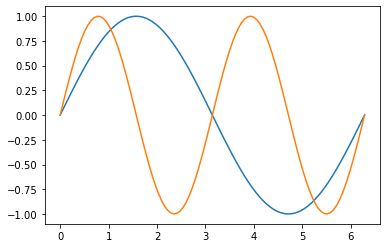

In [17]:
import matplotlib.pyplot as plt

abscisas = np.linspace(0, 2 * np.pi, 100)

plt.plot(abscisas, seno(abscisas))
plt.plot(abscisas, seno(abscisas, omega=2))
plt.show()

# Ejercicio
En el notebook anterior graficamos repetidas veces una función gaussiana centrada en cero modificando el parámetro sigma:

$$ g(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{ -\frac{1}{2}\left(\frac{x}{\sigma}\right)^2 }. $$

Esta tarea podría haber sido más fácil si hubieramos **encapsulado** la función gaussiana dentro de una **función** de Python.
Además, definir funciones para realizar cálculos en los que _no nos queremos equivocar_ nos ayuda a prevenir errores. Especialmente si creamos una función con buena documentación que podemos usar en el futuro.
Estos hábitos (entre otros) forman parte de lo que se conoce como **buenas prácticas** para el desarrollo de software.

1. Escribir una función que evalúe la función Gaussiana y devuelva su valor.
2. Dicha función debe poder admitir un valor de $\sigma$ como argumento, asumiéndolo por defecto igual a 1.
3. Añadir una documentación detallada de la función gaussiana. ¿Qué hace la función? ¿Qué argumentos admite? ¿Qué valores devuelve?
4. Seleccionar al menos tres valores diferentes de $\sigma$ y graficar las gaussianas usando un _for loop_.

**Bonus track**

La expresión generalizada de la función gaussiana es:

$$ g(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{ -\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2 }. $$

Donde $\mu$ indica la abscisa correpondiente al pico de la función.

1. Generalice la función anterior para que admita un argumento adicional `mu`, con valor por defecto igual a 0.
2. Actualice la documentación de la función para el nuevo valor.
3. Seleccione al menos tres valores diferentes de $\mu$ y grafique las gaussianas para un mismo valor de $\sigma$.